In [1]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [2]:
 df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [3]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [4]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [5]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [6]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [7]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [8]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [9]:
df.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
'''
Plan for Pre-Processing the DataSet:

Drop Unnamed: 0 column
Drop flight
One hot encode airline (as not many values present)
One hot encode source_city, destination_city, departure_time, arrival_time   (as not many values present)
Turn stops to a numerical feature from 0 to 2
Turn class into a binary feature
Leave duration, days_left and price as they are (because they are already numerical values)
'''

'\nPlan for Pre-Processing the DataSet:\n\nDrop Unnamed: 0 column\nDrop flight\nOne hot encode airline (as not many values present)\nOne hot encode source_city, destination_city, departure_time, arrival_time   (as not many values present)\nTurn stops to a numerical feature from 0 to 2\nTurn class into a binary feature\nLeave duration, days_left and price as they are (because they are already numerical values)\n'

In [13]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df.stops = pd.factorize(df.stops)[0]    #pandas.factorize() method helps to get the numeric representation of an array by identifying distinct values

In [14]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [15]:
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline', axis=1)
df

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1


In [16]:
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop('source_city', axis=1)
df

,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai
0,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0,0,0,1,0,0,0
1,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0,0,0,1,0,0,0
2,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0,0,0,1,0,0,0
3,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1,0,0,1,0,0,0
4,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1,0,1,0,0,0,0
300149,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1,0,1,0,0,0,0
300150,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1,0,1,0,0,0,0
300151,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1,0,1,0,0,0,0


In [17]:
df = df.join(pd.get_dummies(df.destination_city, prefix='destination', dtype=int)).drop('destination_city', axis=1)
df

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,Evening,0,Night,0,2.17,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Early_Morning,0,Morning,0,2.33,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,Early_Morning,0,Early_Morning,0,2.17,1,5956,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Morning,0,Afternoon,0,2.25,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Morning,0,Morning,0,2.33,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Morning,1,Evening,1,10.08,49,69265,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300149,Afternoon,1,Night,1,10.42,49,77105,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300150,Early_Morning,1,Night,1,13.83,49,79099,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300151,Early_Morning,1,Evening,1,10.00,49,81585,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop('departure_time', axis=1)
df

,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,Night,0,2.17,1,5953,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,Morning,0,2.33,1,5953,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,Early_Morning,0,2.17,1,5956,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,Afternoon,0,2.25,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,Morning,0,2.33,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,Evening,1,10.08,49,69265,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
300149,1,Night,1,10.42,49,77105,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
300150,1,Night,1,13.83,49,79099,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
300151,1,Evening,1,10.00,49,81585,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [19]:
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop('arrival_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop('price', axis=1)
y = df['price']


In [21]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
reg = RandomForestRegressor(n_jobs=-1)        #n_jobs=number of jobs to run in parallel; ``-1`` means using all processors

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [25]:
reg.score(X_test, y_test)

0.9850058474376487

In [26]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9850058474376487
Mean Absolute Error:  1087.998585528141
Mean Squared Error:  7776068.5333695235
Root Mean Squared Error:  2788.560297603321


Text(0.5, 1.0, 'Prediction vs Actual Flight Price')

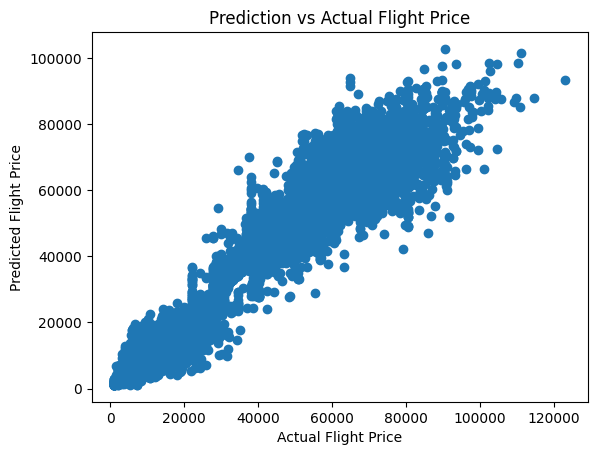

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Flight Price')

In [28]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8800665912313301),
 ('duration', 0.05760035027736679),
 ('days_left', 0.018434391168351136),
 ('airline_Air_India', 0.005134304883540936),
 ('airline_Vistara', 0.004821034366501),
 ('source_Delhi', 0.003754981019890339),
 ('destination_Delhi', 0.003344257448158679),
 ('source_Mumbai', 0.002214619530423534),
 ('destination_Mumbai', 0.001948119035192759),
 ('stops', 0.0018309948123329985),
 ('destination_Kolkata', 0.001799614126972437),
 ('source_Kolkata', 0.0017103364187599248),
 ('destination_Hyderabad', 0.0015256538512069834),
 ('arrival_Evening', 0.0014248158499712974),
 ('source_Hyderabad', 0.0012861035251380013),
 ('destination_Bangalore', 0.0012298991648410252),
 ('arrival_Night', 0.0011938988010933326),
 ('source_Bangalore', 0.0011344132592043827),
 ('departure_Evening', 0.0011070522860952812),
 ('arrival_Afternoon', 0.0010073150068975318),
 ('departure_Morning', 0.0009020815182713769),
 ('source_Chennai', 0.0008737247708965366),
 ('destination_Chennai', 0.0008626104

<BarContainer object of 10 artists>

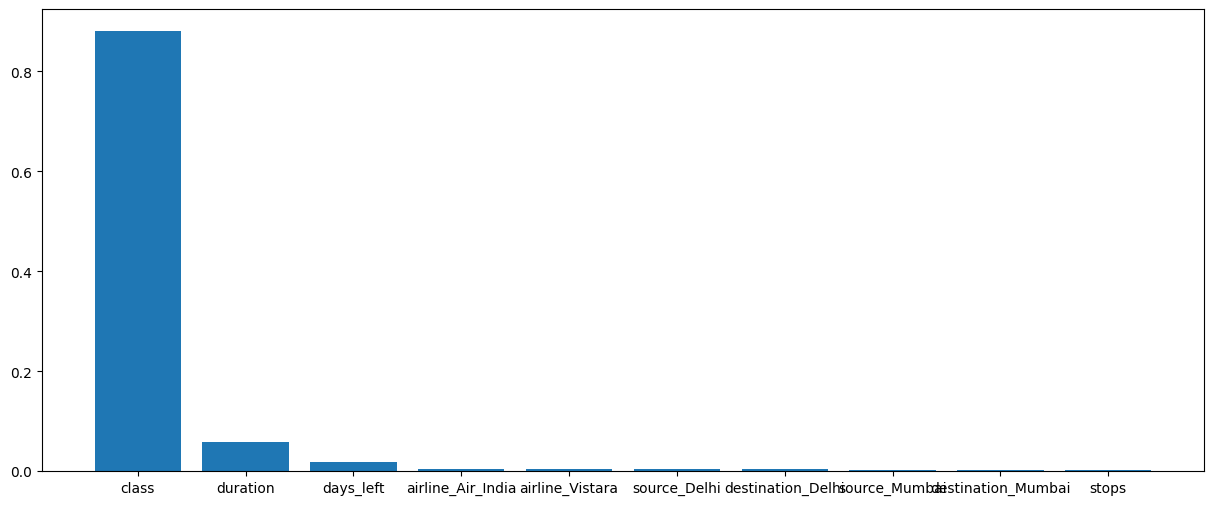

In [29]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])